In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Bagging

In [2]:
# データ準備
df = sns.load_dataset('titanic')
df.dropna(inplace=True)

In [3]:
# X, yを作成
# X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')] 
# 後ほどXに対して更新をおこうなう際に，Viewに対して代入処理をするとSettingWithCopyWarningが発生するため，.dropを使用する
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']

In [4]:
# ラベルエンコーディング
oe = OrdinalEncoder()
# 出力結果をDataFrameにする．NumPyArrayだと後続の処理でエラーになることが多い
oe.set_output(transform='pandas') # sklearnが古い場合は!pip install --upgrade scikit-learnで更新
# デフォルトではうまくカテゴリカル変数のみをターゲットにしてくれないので，カテゴリカル変数に対してのみ処理をするようにする
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
X[cat_cols] = oe.fit_transform(X[cat_cols])

In [5]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# 学習と予測
clf = BaggingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [7]:
# 評価
print(f"bagging AUC: {roc_auc_score(y_test, y_pred[:, 1])}")

bagging AUC: 0.8846153846153846


In [8]:
# 単一の決定木の精度
single_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_tree = single_tree.predict_proba(X_test)
print(f"single tree AUC: {roc_auc_score(y_test, y_pred_tree[:, 1])}")

single tree AUC: 0.7596153846153846


In [9]:
# 弱学習器一覧
clf.estimators_

[DecisionTreeClassifier(random_state=2087557356),
 DecisionTreeClassifier(random_state=132990059),
 DecisionTreeClassifier(random_state=1109697837),
 DecisionTreeClassifier(random_state=123230084),
 DecisionTreeClassifier(random_state=633163265),
 DecisionTreeClassifier(random_state=998640145),
 DecisionTreeClassifier(random_state=1452413565),
 DecisionTreeClassifier(random_state=2006313316),
 DecisionTreeClassifier(random_state=45050103),
 DecisionTreeClassifier(random_state=395371042)]

### Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 1, random_state=0).fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)
print(f"random forest AUC: {roc_auc_score(y_test, y_pred_rf[:, 1])}")

random forest AUC: 0.9447115384615384


[0.01 0.17 0.12 0.06 0.01 0.06 0.01 0.01 0.22 0.24 0.06 0.   0.03]


<BarContainer object of 13 artists>

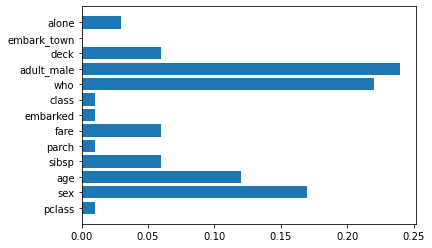

In [16]:
# 特徴量の重要度
print(rf.feature_importances_)
plt.barh(X.columns, rf.feature_importances_)

[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.47\nsamples = 81\nvalue = [48, 79]'),
 Text(0.25, 0.25, 'gini = 0.495\nsamples = 54\nvalue = [39, 48]'),
 Text(0.75, 0.25, 'gini = 0.349\nsamples = 27\nvalue = [9, 31]')]

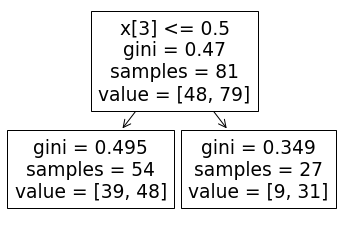

In [17]:
# 弱学習器の木構造を描画
plot_tree(rf.estimators_[1])